In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('plotting.mplstyle')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


This notebook creates the stacked plot in this presentation of primary energy production by source based on data from the April 2024 EIA Monthly Energy Report. Cited as:

@techreport{office_of_energy_statistics_us_2024,
	address = {Washington, DC 20585},
	title = {{US} {Monthly} {Energy} {Review} - {April} 2024},
	url = {https://www.eia.gov/totalenergy/data/monthly/archive/00352404.pdf},
	abstract = {The Monthly Energy Review (MER) is the U.S. Energy Information Administration’s (EIA) primary report of recent and
historical U.S. energy statistics. Included are statistics on total energy production, consumption, stocks, trade, and energy
prices; overviews of petroleum, natural gas, coal, electricity, nuclear energy, and renewable energy; carbon dioxide
emissions; and data unit conversions.
Release of the MER is in keeping with responsibilities given to EIA in Public Law 95–91 (Department of Energy Organization
Act), which states, in part, in Section 205(a)(2):
“The Administrator shall be responsible for carrying out a central, comprehensive, and unified energy data and information
program which will collect, evaluate, assemble, analyze, and disseminate data and information…”
The MER is intended for use by members of Congress, federal and state agencies, energy analysts, and the general public.
EIA welcomes suggestions from readers regarding MER content and other EIA publications.},
	language = {en},
	number = {DOE/EIA-0035(2024/4 )},
	urldate = {2025-02-26},
	institution = {Energy Information Administration},
	author = {{Office of Energy Statistics}},
	month = apr,
	year = {2024},
	pages = {5},
	file = {2024 - Monthly Energy Review - April 2024.pdf:/Users/nsryan/Zotero/storage/V6MNE7BF/2024 - Monthly Energy Review - April 2024.pdf:application/pdf},
}

In [6]:
# import primary-energy as pandas df
df = pd.read_csv('primary-energy-production-by-major-source-history.csv', index_col=0)

In [19]:
df

,coal,natural gas,crude oil,NGPL,nuclear,renewables
1950,14.060,6.233,11.447,0.813,0.000,1.907
1951,14.419,7.416,13.037,0.910,0.000,1.891
1952,12.734,7.964,13.281,0.986,0.000,1.849
1953,12.278,8.339,13.671,1.051,0.000,1.793
1954,10.542,8.682,13.427,1.101,0.000,1.775
...,...,...,...,...,...,...
2019,14.256,35.187,25.604,6.352,8.452,7.753
2020,10.703,35.062,23.575,6.805,8.251,7.465
2021,11.596,35.807,23.401,7.099,8.131,7.807
2022,12.043,37.662,24.710,7.742,8.061,8.307


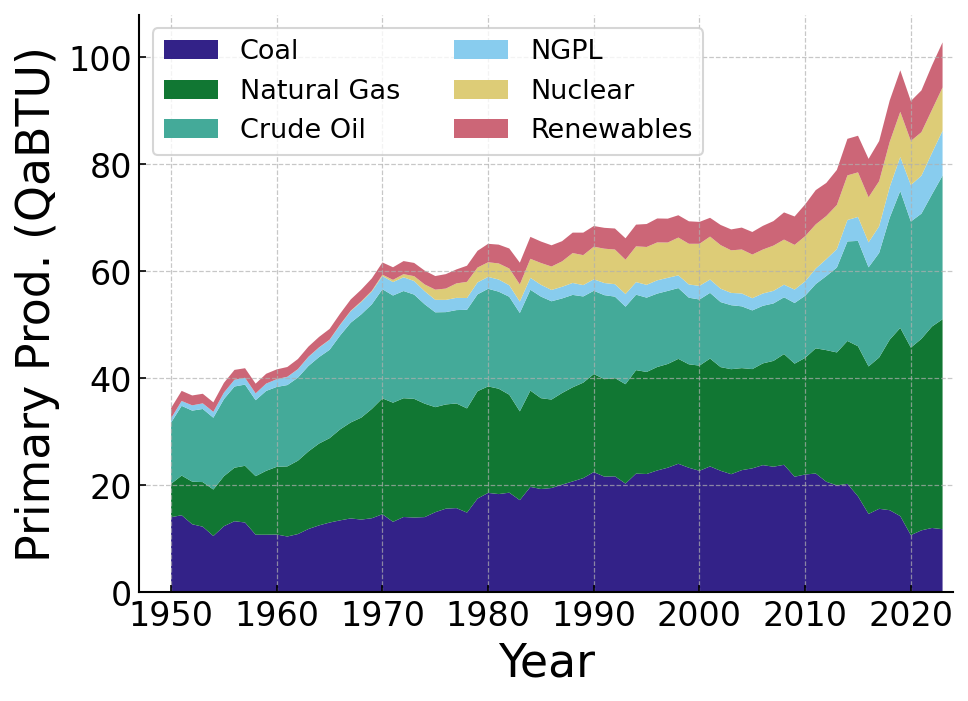

In [24]:
plt.stackplot(df.index, df.values.T, labels=df.columns)
plt.xlabel('Year')
plt.ylabel('Primary Prod. (QaBTU)')
plt.xlim(1947,2024)

# rename legend labels
legend = plt.legend(loc='upper left', ncol=2)
legend.get_texts()[0].set_text('Coal')
legend.get_texts()[1].set_text('Natural Gas')
legend.get_texts()[2].set_text('Crude Oil')
legend.get_texts()[3].set_text('NGPL')
legend.get_texts()[4].set_text('Nuclear')
legend.get_texts()[5].set_text('Renewables')


plt.savefig('prim_prod_b_source.pdf')